### trivial_AcO_M1Pos_FEM_cl_seg1-6_mount

In [ ]:
import dos
from IPython.display import Image
path = './dos/AcO_M1Pos_FEM_cl_seg1-6_mount'

In [ ]:
# init
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png')

In [ ]:
sim.start()

In [ ]:
sim.pctComplete

In [ ]:
sim.join()
sim.terminate()

logs = sim.logs.entries

In [1]:
# Save
import pickle
"""
with open('./logs/AcO_M1Pos_FEM_cl_seg1-6_mount.sclogs', 'wb') as f:
    pickle.dump(sim.logs.entries, f)
    logs = sim.logs.entries
"""
# Load
'''
logs = pickle.load( open( './logs/AcO_M1Pos_FEM_cl_seg1-6_mount.sclogs', "rb" ) )
''';

# plot logs
---

In [3]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

try:
    duration = sim.cfg['simulation']['duration']
except NameError:
    duration = logs['FEM']['OSS_M1_lcl'].timeSeries[0][-1]
    
xticks = np.arange(0, duration + 1, duration/ 10)

logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7f382b31b110>},
 'AcO_controller': {'M1 TxyzRxyz': <dos.dos.Entry at 0x7f37fcaccb50>,
  'M2 Txyz': <dos.dos.Entry at 0x7f37fcaccfd0>,
  'M2 Rxyz': <dos.dos.Entry at 0x7f37fcad0490>,
  'M1 BM': <dos.dos.Entry at 0x7f37fcad0910>},
 'M1Pos0': {'M1Pos_DeltaF': <dos.dos.Entry at 0x7f37fcad0dd0>},
 'Mount': {'Mount_AzDrive_F': <dos.dos.Entry at 0x7f37ed245c10>,
  'Mount_ElDrive_F': <dos.dos.Entry at 0x7f37e2edaa10>,
  'Mount_GIRDrive_F': <dos.dos.Entry at 0x7f37d7afe7d0>},
 'FEM': {'OSS_M1_lcl': <dos.dos.Entry at 0x7f37cf035610>,
  'OSS_Hardpoint_D': <dos.dos.Entry at 0x7f37bc775410>},
 'Reshape': {'M1 Txyz': <dos.dos.Entry at 0x7f37b543c250>,
  'M1 Rxyz': <dos.dos.Entry at 0x7f37b544e910>}}

In [4]:
time_1 = logs['FEM']['OSS_M1_lcl'].timeSeries[0]
time_2000 = logs['wfs48']['M12_RBM'].timeSeries[0]
time_50000 = logs['AcO_controller']['M1 BM'].timeSeries[0]

AcO_ref = logs['AcO_controller']['M1 TxyzRxyz'].timeSeries[1]
FEM_out = logs['FEM']['OSS_M1_lcl'].timeSeries[1]

Mount_Az = logs['Mount']['Mount_AzDrive_F'].timeSeries[1]
Mount_El = logs['Mount']['Mount_ElDrive_F'].timeSeries[1]
Mount_GIR = logs['Mount']['Mount_GIRDrive_F'].timeSeries[1]

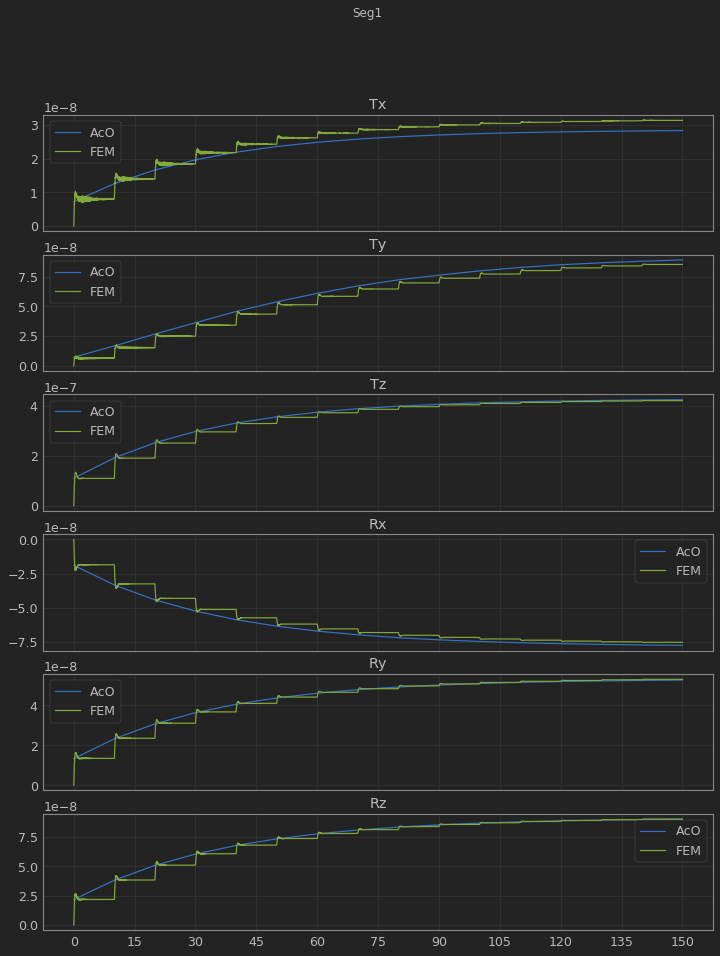

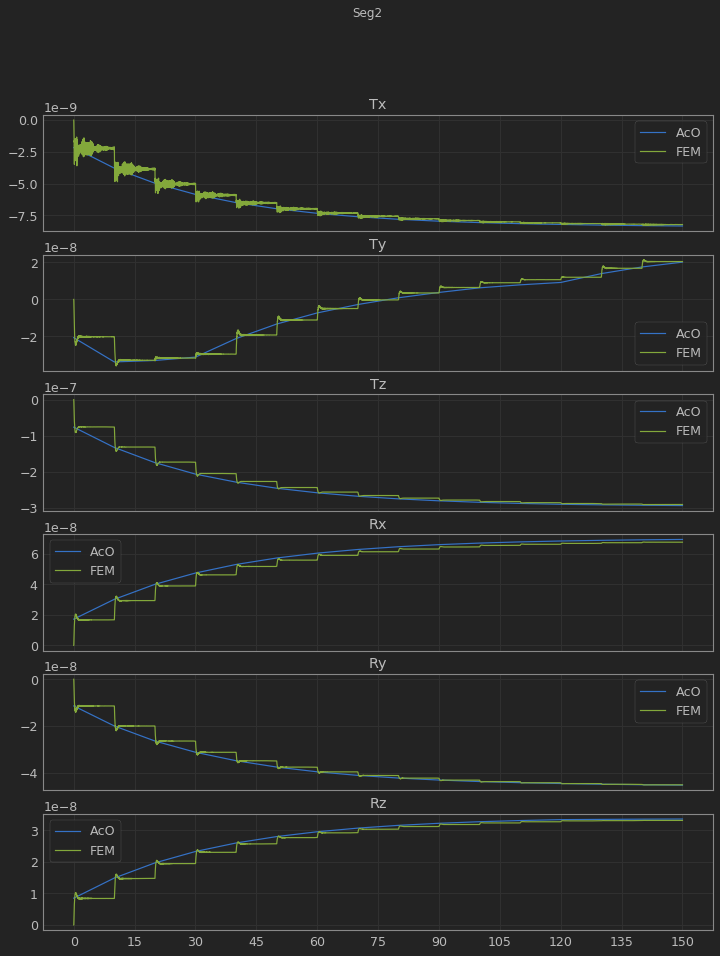

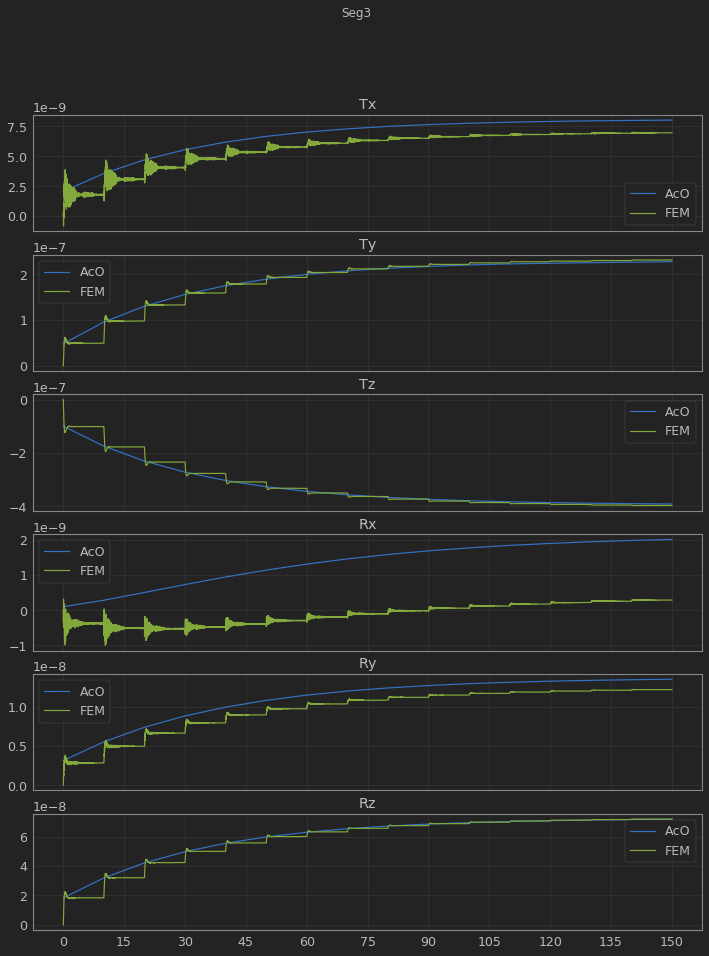

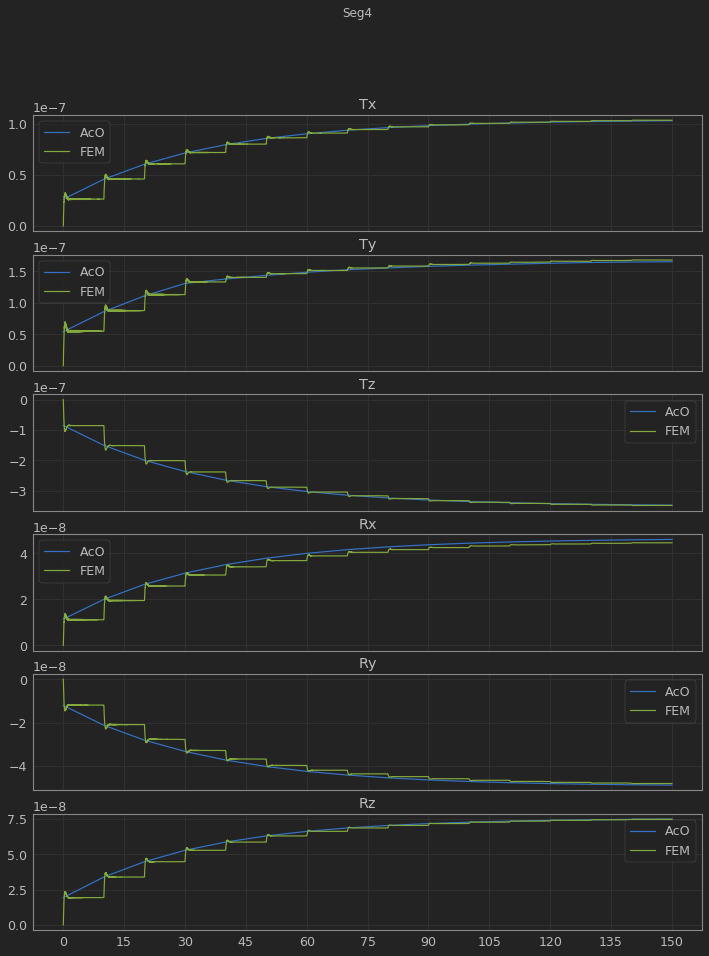

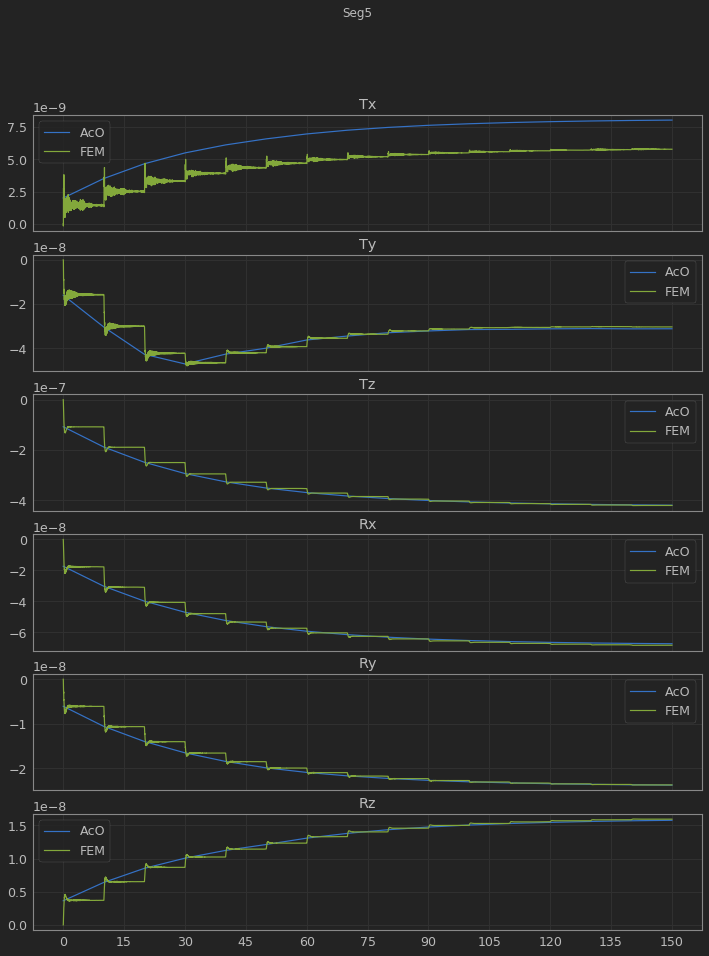

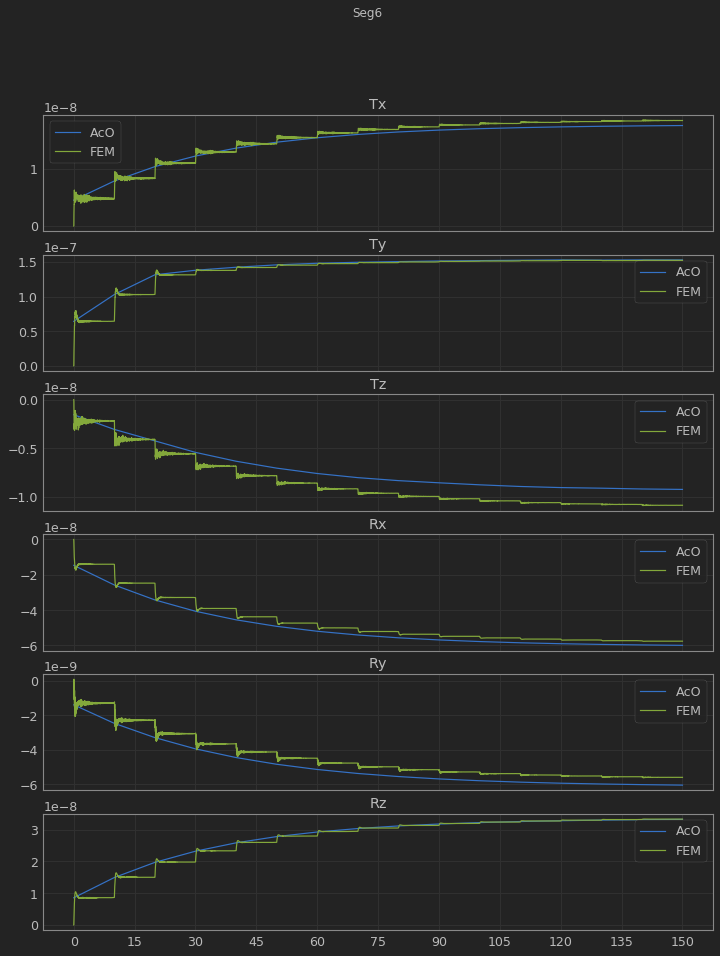

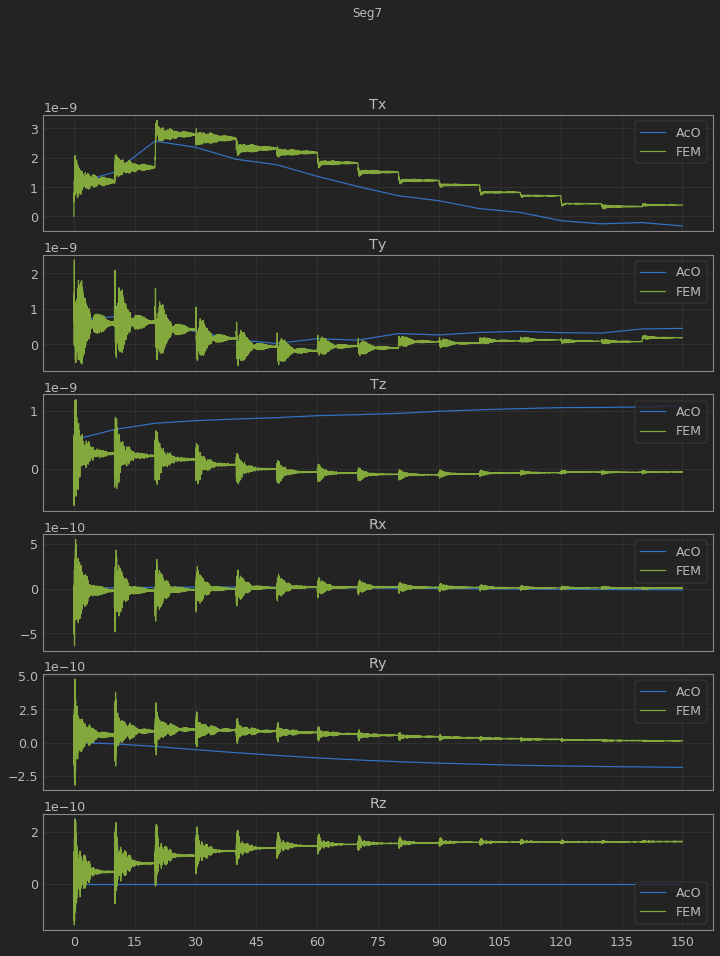

In [5]:
seg = list(range(7))
TRxyz = list(range(6))
rbm_str = ['Tx','Ty','Tz','Rx','Ry','Rz']
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for rbm in TRxyz:
        ax[rbm].plot(time_1[::20000], AcO_ref[s,rbm,:], label = 'AcO')
        ax[rbm].plot(time_1, FEM_out[:,s * 6  + rbm], label = 'FEM')
        ax[rbm].set_xticks(xticks)
        ax[rbm].set_title(rbm_str[rbm])
        ax[rbm].legend(loc="best")
    plt.show()

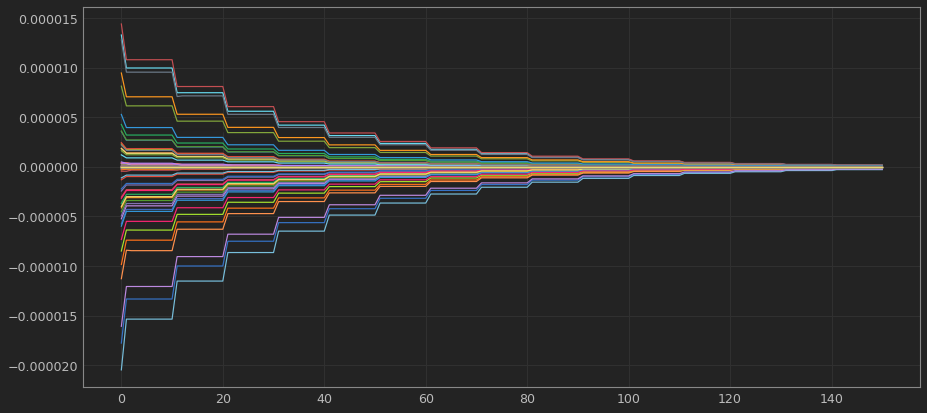

In [6]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(wfs)
plt.show()

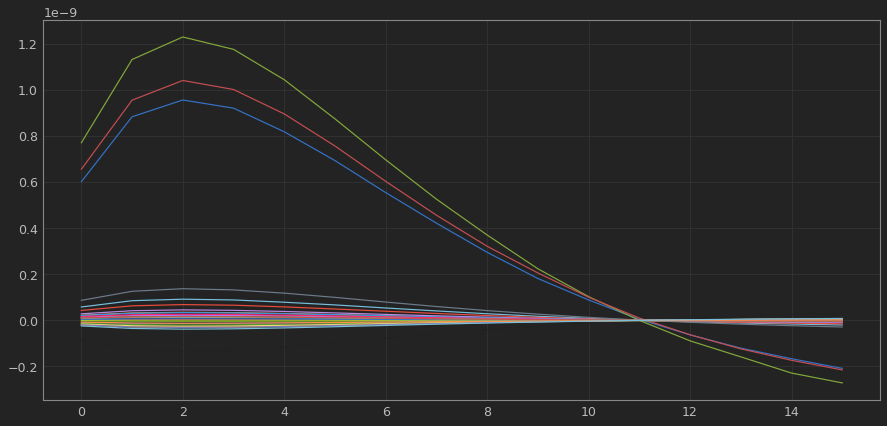

In [7]:
BM = logs['AcO_controller']['M1 BM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(BM[0,:,:].T)
plt.show()

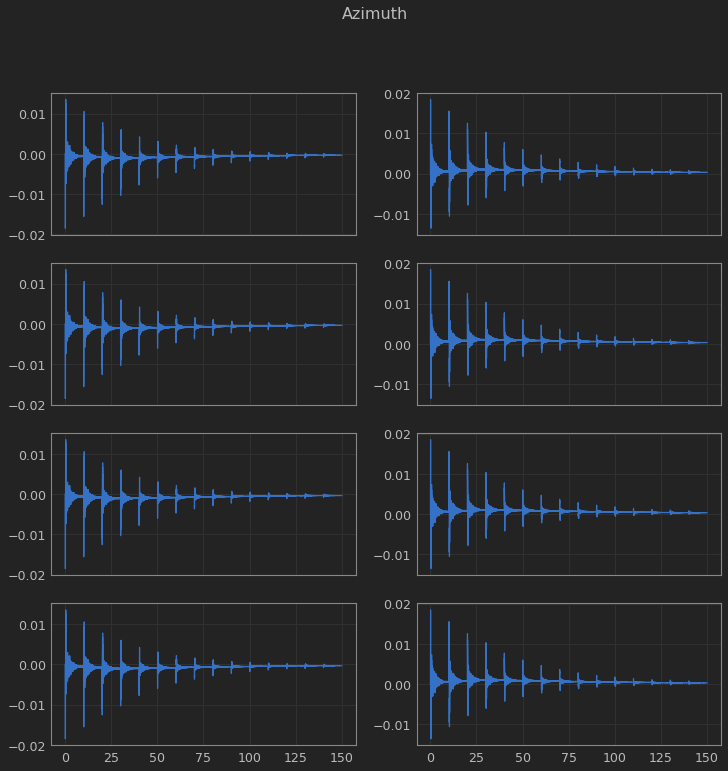

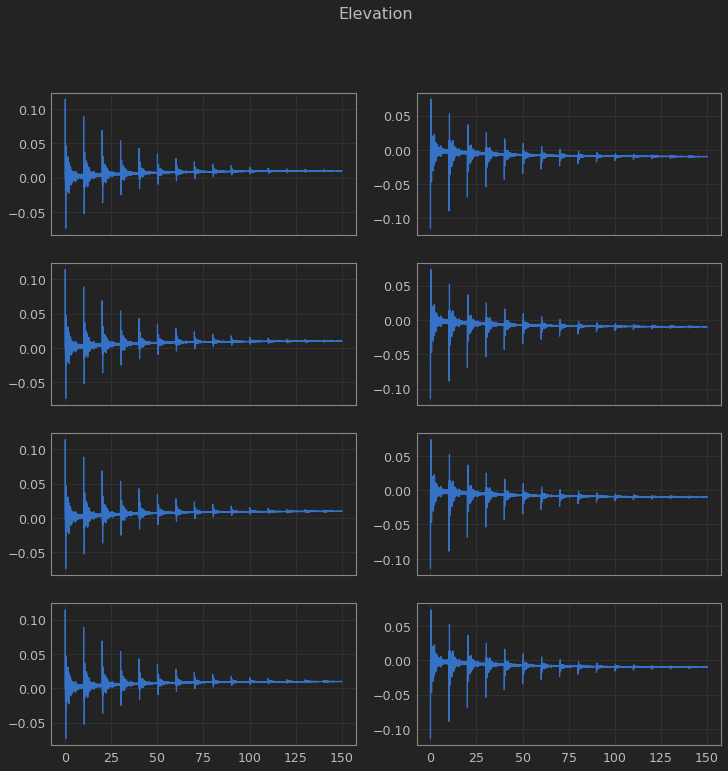

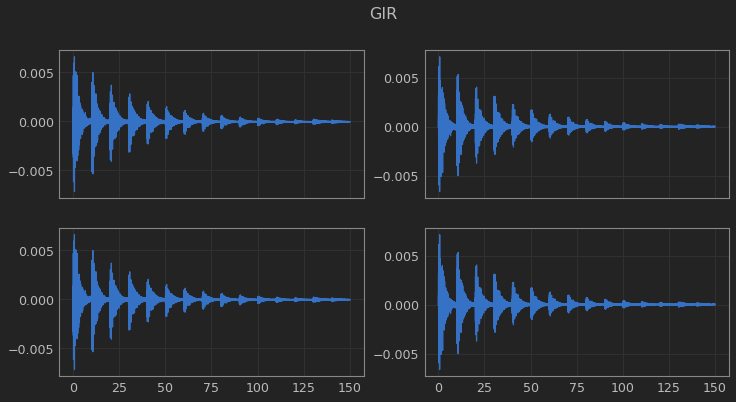

In [8]:
fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Azimuth', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_Az[:,m])
plt.show()

fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Elevation', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_El[:,m])
plt.show()

fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,6))
fig.suptitle('GIR', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(4):
    ax[m%2,m//2].plot(time_1,Mount_GIR[:,m])
plt.show()

---

In [9]:
logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7f382b31b110>},
 'AcO_controller': {'M1 TxyzRxyz': <dos.dos.Entry at 0x7f37fcaccb50>,
  'M2 Txyz': <dos.dos.Entry at 0x7f37fcaccfd0>,
  'M2 Rxyz': <dos.dos.Entry at 0x7f37fcad0490>,
  'M1 BM': <dos.dos.Entry at 0x7f37fcad0910>},
 'M1Pos0': {'M1Pos_DeltaF': <dos.dos.Entry at 0x7f37fcad0dd0>},
 'Mount': {'Mount_AzDrive_F': <dos.dos.Entry at 0x7f37ed245c10>,
  'Mount_ElDrive_F': <dos.dos.Entry at 0x7f37e2edaa10>,
  'Mount_GIRDrive_F': <dos.dos.Entry at 0x7f37d7afe7d0>},
 'FEM': {'OSS_M1_lcl': <dos.dos.Entry at 0x7f37cf035610>,
  'OSS_Hardpoint_D': <dos.dos.Entry at 0x7f37bc775410>},
 'Reshape': {'M1 Txyz': <dos.dos.Entry at 0x7f37b543c250>,
  'M1 Rxyz': <dos.dos.Entry at 0x7f37b544e910>}}

In [16]:
reshapeTxyz = logs['Reshape']['M1 Txyz'].timeSeries[1]
reshapeRxyz = logs['Reshape']['M1 Rxyz'].timeSeries[1]
reshapeRxyz

(7, 3, 151)

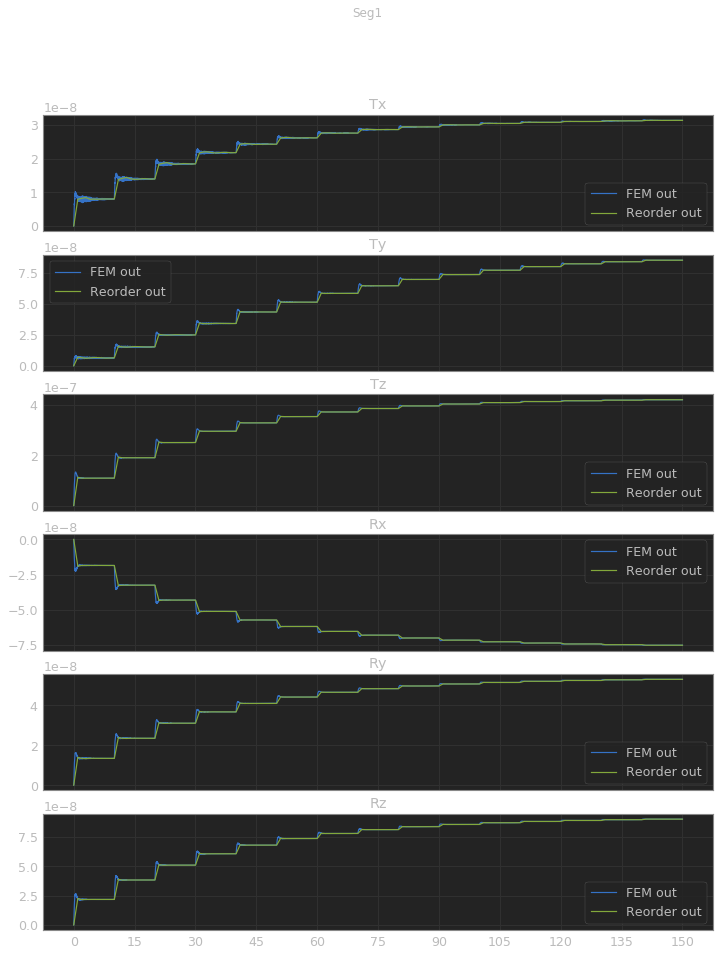

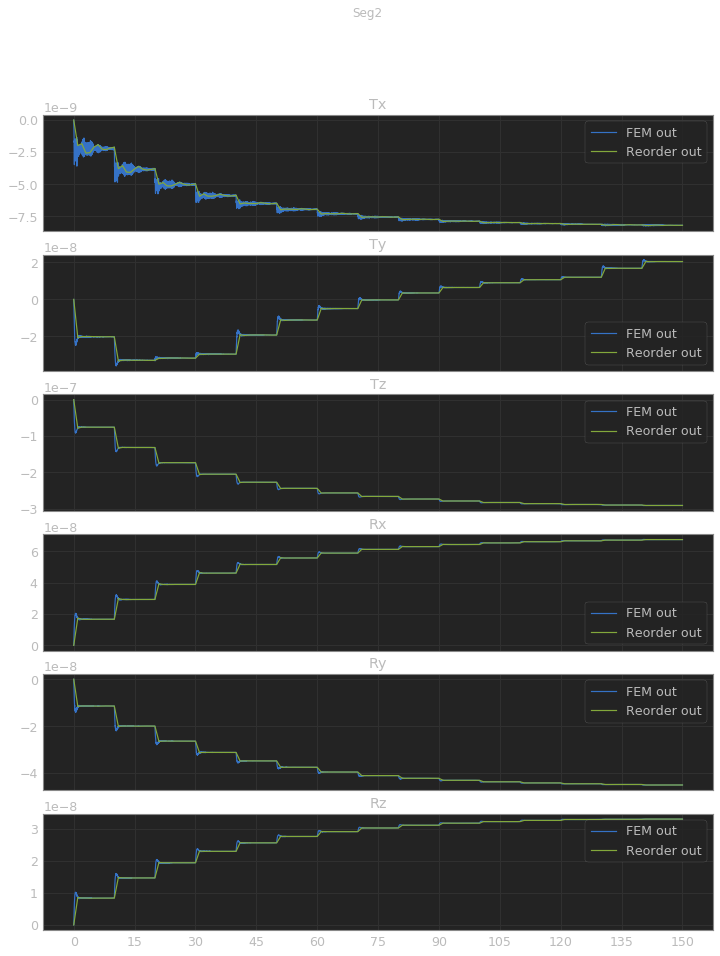

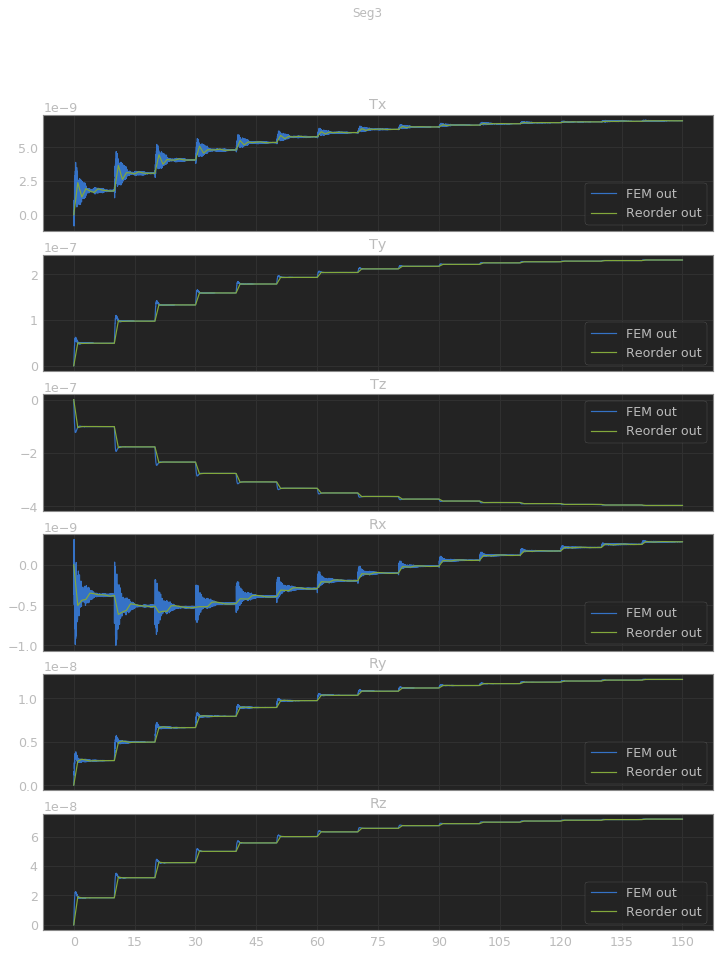

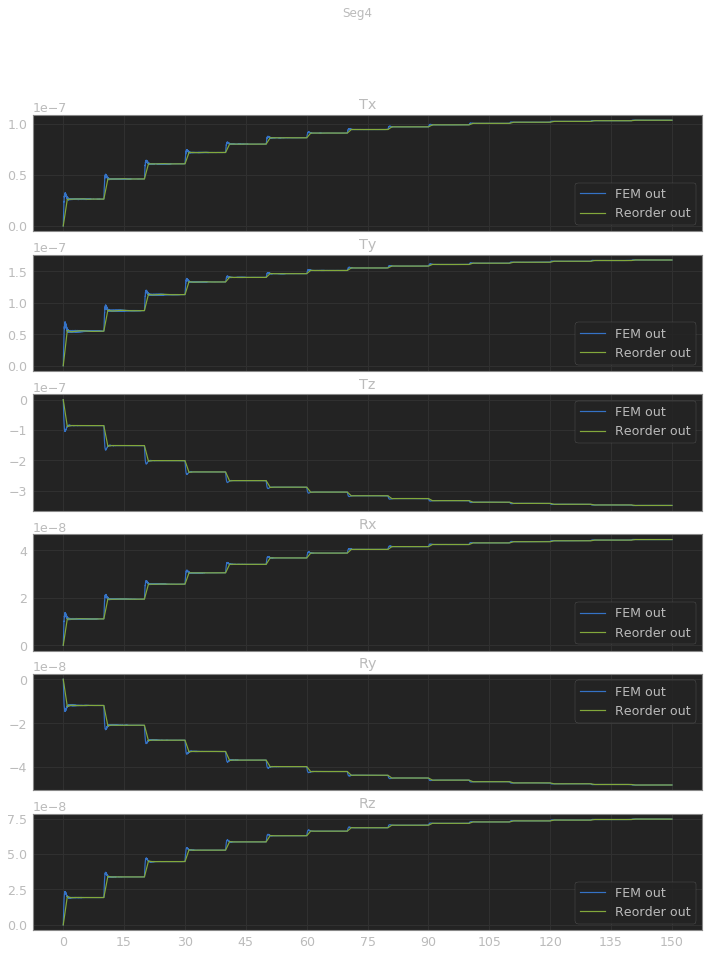

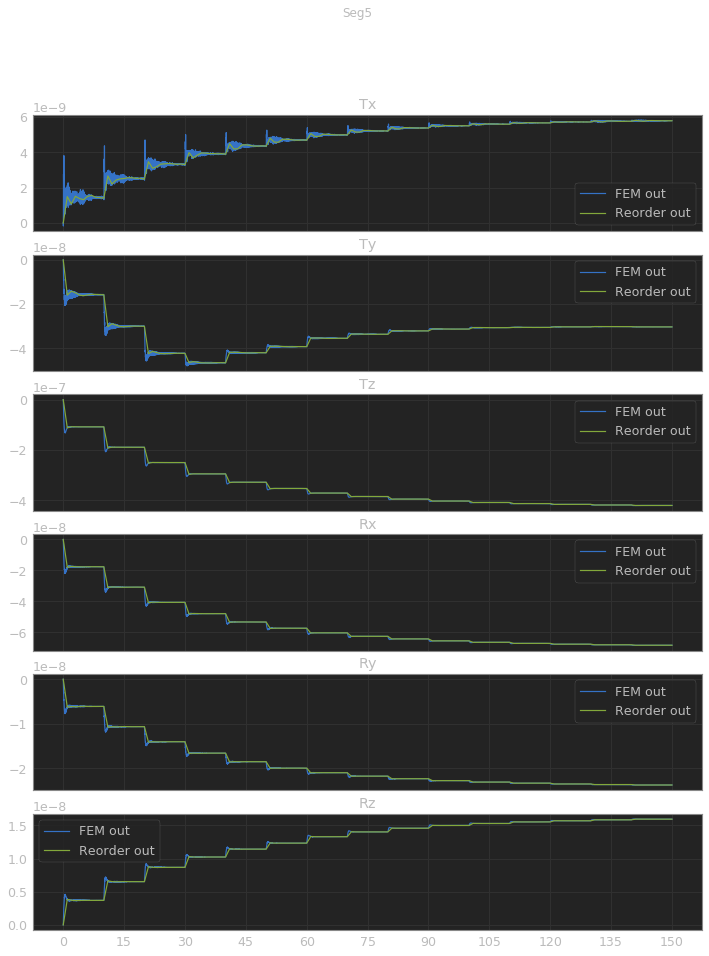

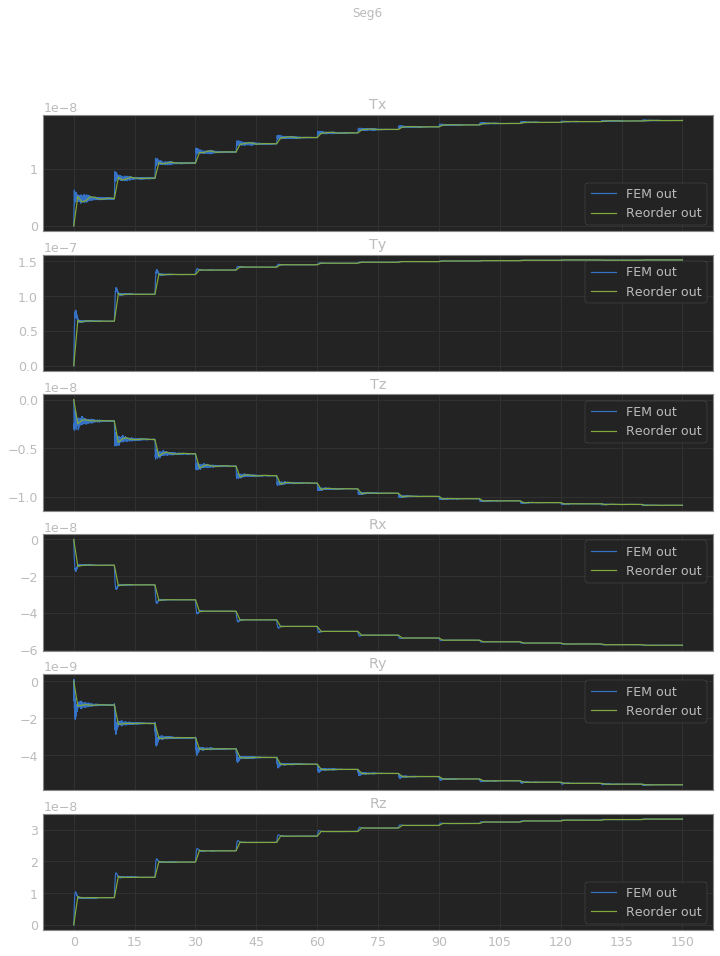

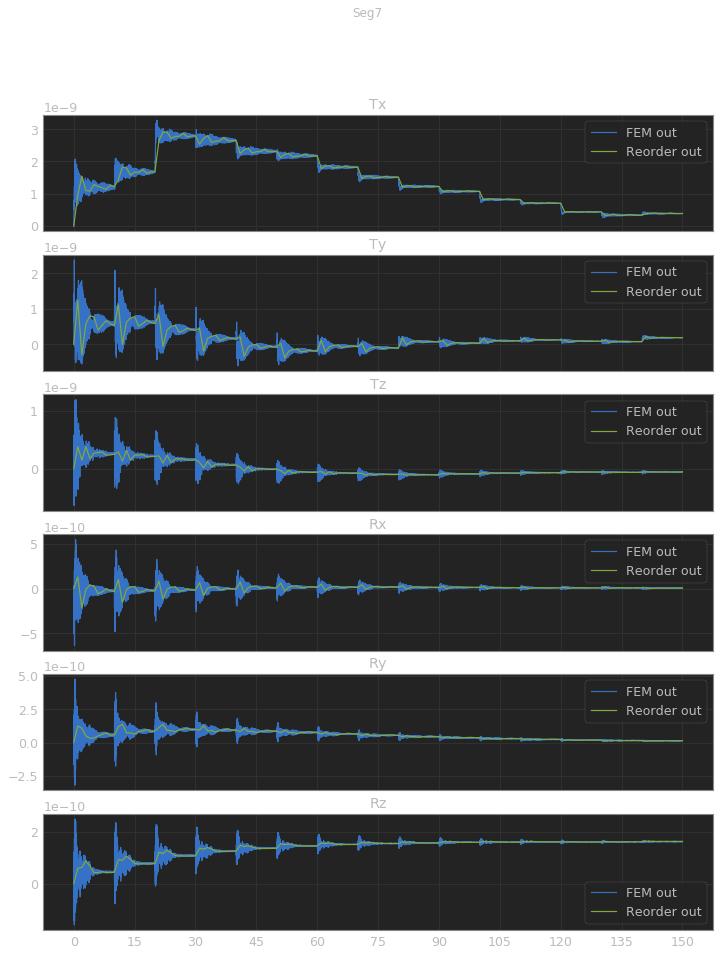

In [30]:
%matplotlib inline

seg = list(range(7))
TRxyz = list(range(6))
rbm_str = ['Tx','Ty','Tz','Rx','Ry','Rz']
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for rbm in TRxyz:
        ax[rbm].plot(time_1, FEM_out[:,s * 6  + rbm], label = 'FEM out')
        if rbm <= 2:
            ax[rbm].plot(time_2000,reshapeTxyz[s,rbm,:], label = 'Reorder out')
        else:
            ax[rbm].plot(time_2000,reshapeRxyz[s,rbm - 3,:], label = 'Reorder out')
        ax[rbm].set_xticks(xticks)
        ax[rbm].set_title(rbm_str[rbm])
        ax[rbm].legend(loc="best")
plt.show()